In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = {
  "employee ID": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
  "gender": ["Male","Male","Female","Female","Male","Female","Male","Male","Male","Male","Male","Male","Female","Male","Female","Female","Female","Male","Male","Male","Male","Female","Male","Male"],
"age":[45,35,29,34,36,38,25,28,29,52,48,27,56,34,36,39,25,26,28,29,32,34,36,38],
"sales":[1000,2000,4000,300,2000,6000,2000,3000,1000,7000,3000,2000,4000,3000,3500,4000,5000,3000,2000,2500,6000,3000,3000,2500],
"BMI":[18.5,20,25,32,20,25,26,24,22,21,28,17,15,29,29,23,33,33,22,26,25,24,29,30],
"Income":[15000,20000,30000,14500,13500,15000,14500,20000,15000,25000,15000,12000,14000,15000,25000,15000,15000,25000,3000,20000,15000,25000,15000,12000],
"joining_date" : ["11-04-2021","11-05-2021","10-06-2021","10-07-2021","09-08-2021","08-09-2021","08-10-2021","07-11-2021","07-12-2021","06-01-2022","05-02-2022","07-03-2022","06-04-2022","06-05-2022","05-06-2022","05-07-2022","04-08-2022","03-09-2022","03-10-2022","02-11-2022","02-12-2022","01-01-2023","31-01-2023","02-03-2023"]
}

df = pd.DataFrame(data)
df["joining_date"] = pd.to_datetime(df["joining_date"])

C:\Users\singi\AppData\Local\Temp\ipykernel_9632\2410148017.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["joining_date"] = pd.to_datetime(df["joining_date"])


•	Create a gender wise histogram showing count of employees 

<AxesSubplot: xlabel='gender', ylabel='employee ID'>

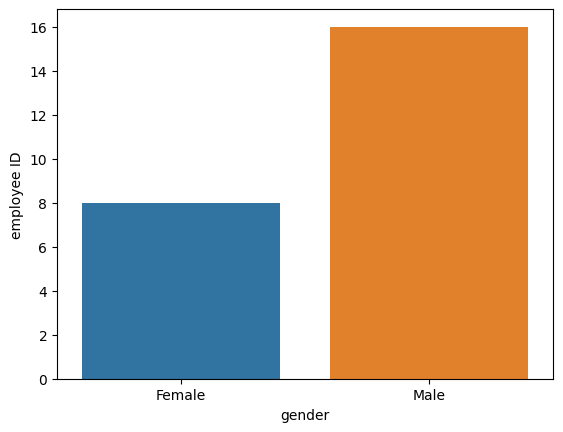

In [13]:
gender_df = df.groupby(["gender"]).agg({'employee ID':'count'}).reset_index()
sns.barplot(data=gender_df, x="gender",y="employee ID")

Lets add a legend

<AxesSubplot: xlabel='gender', ylabel='employee ID'>

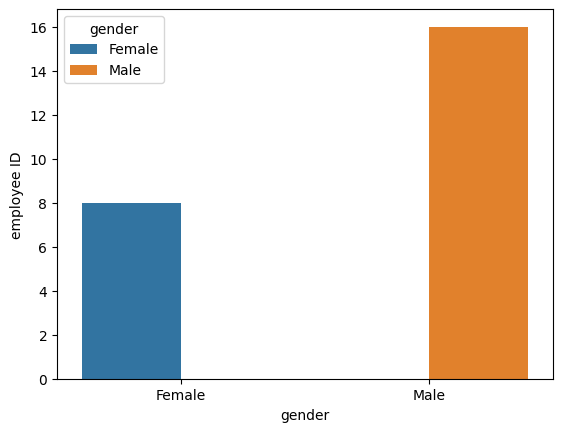

In [14]:
sns.barplot(data=gender_df, x="gender",y="employee ID",hue="gender")

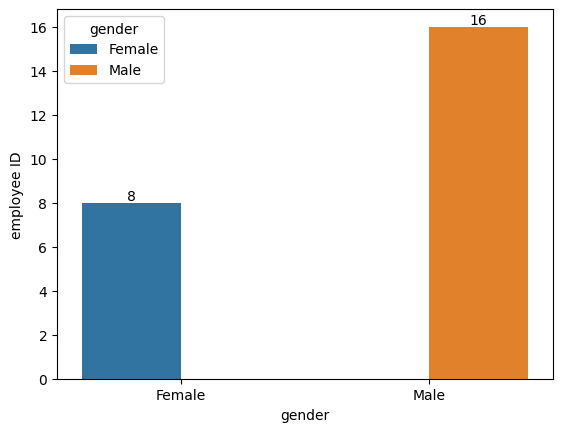

In [15]:
ax = sns.barplot(data=gender_df, x="gender",y="employee ID",hue="gender")
for container in ax.containers:
    ax.bar_label(container)

•	Create a histogram to understand the sales distribution

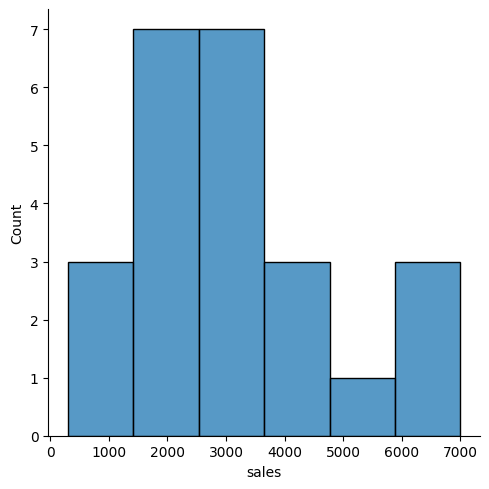

In [16]:
sns.displot(data=df, x="sales")

•	Create an age group bin and plot a bar chart for each age group showing count of employees in each group

In [17]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)


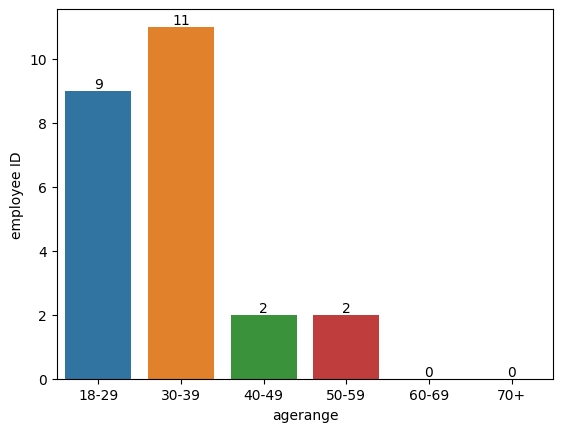

In [18]:
age_df = df.groupby(["agerange"]).agg({'employee ID':'count'}).reset_index()
ax1 = sns.barplot(data=age_df, x="agerange",y="employee ID")
for container in ax1.containers:
    ax1.bar_label(container)

•	Create BMI Category as shown below

*	BMI Categories:
    *	Underweight = <18.5
    *	Normal weight = 18.5–24.9
    *	Overweight = 25–29.9
    *	Obesity = BMI of 30 or greater


In [19]:
bins = [0,18.5,24.9,29.9,100]
labels = ['Underweight','Normal weight','Overweight','Obesity']
df['BMI_Category'] = pd.cut(df.BMI, bins, labels = labels,include_lowest = True)


We need to create a pivot table to get the BMI category and age average

In [20]:
table = pd.pivot_table(df, values='age', index=["agerange"],
                    columns=[ "BMI_Category"], aggfunc=np.mean, fill_value=0)

Clean the table index and separate the data for our chart as X and Y axis

In [21]:
table = table.reset_index()
table
x = table['agerange']
y = table[['Underweight','Normal weight','Overweight','Obesity']]

We apply the data to matplot lib and create the area chart 

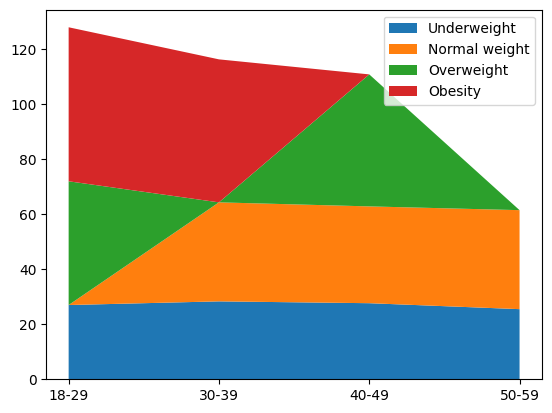

In [23]:
plt.stackplot(x,y, labels=['Underweight','Normal weight','Overweight','Obesity'])
plt.legend(loc='upper right')
plt.show()

•	The company wants to find a way to categories employees who made Best, Good and Bad sales, as a data analyst what would be you approach? 